<h1 style="text-align:center">DC Motor PD Controller Design Example</h1>
<h3 style="text-align:center">MCHE474: Control Systems</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

In [a prior in-class exercise](), we found the transfer function of an armature-controlled DC motor to be:
    
$ \quad \frac{K_1}{s(\tau_1 s + 1)} $

where:

$ \quad K_1 = \frac{K_m}{R_a b + K_bK_m} $

$ \quad \tau_1 = \frac{R_a J}{K_bK_m + R_a b} $

and $K_m$ is the motor constant, $b$ represents frictional effects, $J$ is the inertia of the load, $R_a$ is the armature resistance, and $K_b$ is the proportionality constant between motor speeds and back emf voltage.


We will be looking a the potential use of Proportional-plus-derivative (PD) control for this motor, with the goal of making the shaft output angle match some desired angle. In this case, the block diagram for the control system looks like the one in Figure 1.

<p style="text-align:center">
	<img src="http://shared.crawlab.org/blockDiagram_normalFeedback.png" alt="Feedback Control Block Diagram" width=50%><br>
    <strong>Figure 1: Feedback Control Block Diagram</strong>
</p>

In this example, the plant transfer function, $G_p$, matches that of the DC motor:

$ \quad G_p(s) = \frac{K_1}{s(\tau_1 s + 1)} $

The controller block, $G_c$, is the PD controller:

$ \quad G_c(s) = k_p + k_d s $

We can rewrite the PD controller in the form below, to put the open-loop transfer function into a form suitable for the root locus:

$ \quad G_c(s) = k_p (1 + \frac{k_d}{k_p} s) = k_p (1 + T_d s) $

where 

$ \quad T_d = \frac{k_d}{k_p} $

So, the open-loop tranfer function, $G_cG_p$, is:

$ \quad G_cG_p = \frac{k_pK_1 ( 1 + T_d s)}{s (\tau_1 s + 1)} $

To plot a root locus for gain $k_p$, we will need to specify an initial choice for $T_d$, which will serve to place the zero from the PD controller. Here, that zero can either be to the left or the right of the pole at $-1/\tau_1$.

***Note:*** The parameters we're using here for $k_1$ and $\tau_1$ are not generally representative of a real DC motor, but instead are chosen to make our reasoning about this problem more generalizable.

As usual, we'll being the "code" part of the notebook with the usual imports of NumPy, the Control Systems Library, and matplotlib.

In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## PD Zero to the Left of Pole

We'll first look at the case where the PD controller zero is placed to the left of the plant pole at $-1/\tau_1$. 

In [3]:
k1 = 1.0
tau = 1.0
td = 0.5

# Now, define the open-loop system
num = [k1 * td, k1]
den = [tau, 1, 0]

sys = control.tf(num, den)

We can start by plotting the poles and zeros of the open-loop transfer function. Most of the code below is just to make the plot easier to read.

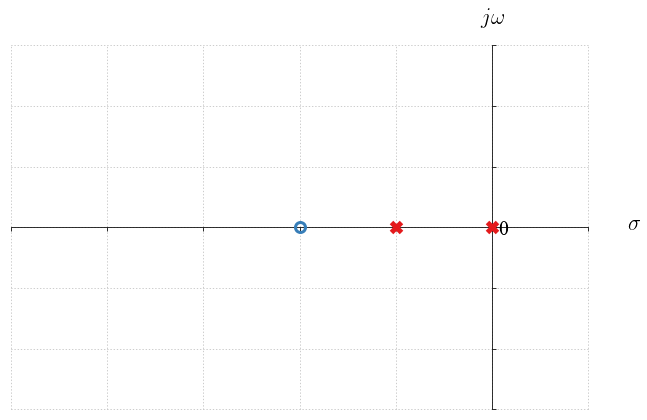

In [4]:
poles, zeros = control.pzmap.pzmap(sys, Plot=False)

# Let's plot the pole-zero map with better formatting than the stock command would

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(5/6, 1.05)


plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')


# uncomment below and set limits if needed
plt.xlim(-5, 1)
# plt.ylim(0, 10)

plt.xticks([-5,-4,-3,-2,-1,0, 1],['','','','','','' ,''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.5, -1.0, -0.5, 0, 0.5, 1, 1.5],['','', '', '0', '','',''])

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_PoleZeroMap.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Now, we can plot the root locus, using the control System Library's built in `.root_locus()` function. We'll add a few options:
* `kvect=np.linspace(0,50,50001)` : Specify the range of gains to plot the locus over
* `Plot=False` : Don't plot the results (since we want to plot them ourselves to give better control over the styling)

In [5]:
roots, gains = control.root_locus(sys, kvect = np.linspace(0,50,50001), Plot=False)

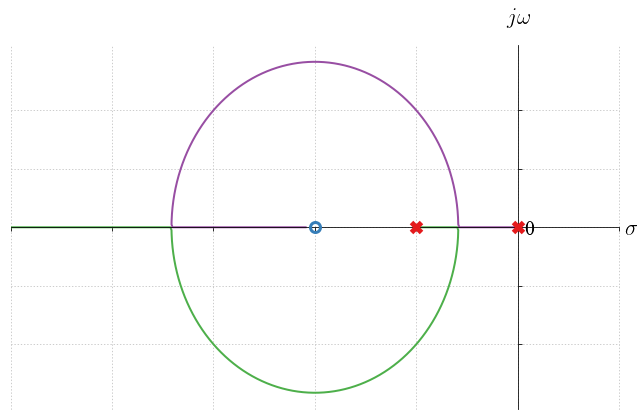

In [6]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.02, .525)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(5/6, 1.05)

plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')

plt.plot(roots.real, roots.imag, linewidth=2, linestyle='-', label=r'Data 1')


plt.xticks([-5,-4,-3,-2,-1,0, 1],['','','','','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.0, -0.5, 0, 0.5, 1],['','', '0', '',''])

# uncomment below and set limits if needed
plt.xlim(-5, 1)
# plt.ylim(0, 10)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('example_rootLocus.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## PD Zero to the Right of Pole

Now, let's look at the case where the PD controller zero is placed to the right of the plant pole at $-1/\tau_1$. 

In [7]:
k1 = 1.0
tau = 1.0
td = 2.0

# Now, define the open-loop system
num = [k1 * td, k1]
den = [tau, 1, 0]

sys = control.tf(num, den)

We can start by plotting the poles and zeros of the open-loop transfer function. Most of the code below is just to make the plot easier to read.

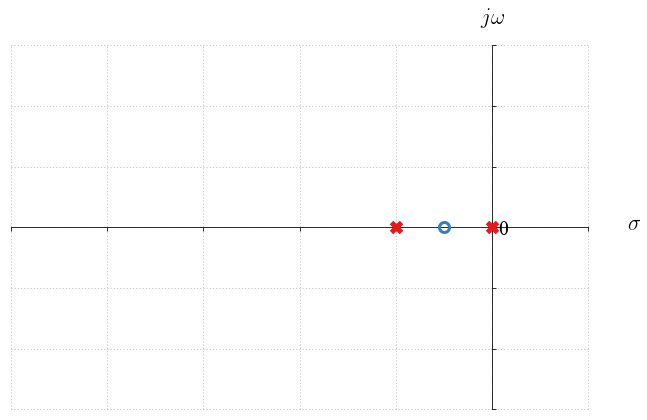

In [8]:
poles, zeros = control.pzmap.pzmap(sys, Plot=False)

# Let's plot the pole-zero map with better formatting than the stock command would

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.08, .54)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(5/6, 1.05)


plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')


# uncomment below and set limits if needed
plt.xlim(-5, 1)
# plt.ylim(0, 10)

plt.xticks([-5,-4,-3,-2,-1,0, 1],['','','','','','' ,''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.5, -1.0, -0.5, 0, 0.5, 1, 1.5],['','', '', '0', '','',''])

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
# ltext  = leg.get_texts()
# plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE474_ExtraZero_PoleZeroMap.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Now, we can plot the root locus, using the control System Library's built in `.root_locus()` function. We'll add a few options:
* `kvect=np.linspace(0,50,50001)` : Specify the range of gains to plot the locus over
* `Plot=False` : Don't plot the results (since we want to plot them ourselves to give better control over the styling)

In [9]:
roots, gains = control.root_locus(sys, kvect = np.linspace(0,50,50001), Plot=False)

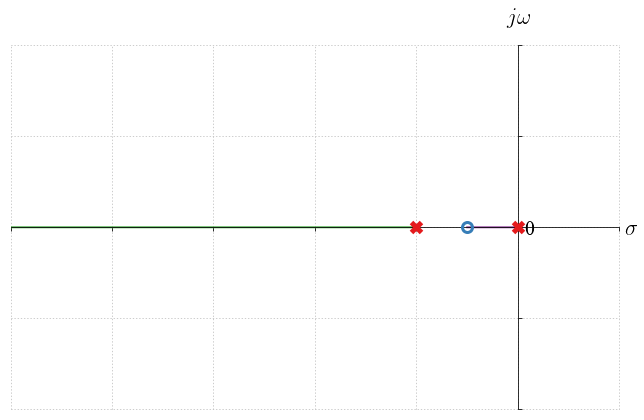

In [10]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['left'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_position('zero')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('right')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
# Define the X and Y axis labels
plt.xlabel('$\sigma$', family='serif', fontsize=22, weight='bold', labelpad=5)
ax.xaxis.set_label_coords(1.02, .525)


plt.ylabel('$j\omega$', family='serif', fontsize=22, weight='bold', rotation=0, labelpad=10)
ax.yaxis.set_label_coords(5/6, 1.05)

plt.plot(np.real(poles), np.imag(poles), linestyle='', 
         marker='x', markersize=10, markeredgewidth=5, 
         zorder = 10, label=r'Poles')

plt.plot(np.real(zeros), np.imag(zeros), linestyle='', 
         marker='o', markersize=10, markeredgewidth=3, markerfacecolor='none', 
         zorder = 10, label=r'Zeros')

plt.plot(roots.real, roots.imag, linewidth=2, linestyle='-', label=r'Data 1')


plt.xticks([-5,-4,-3,-2,-1,0, 1],['','','','','','',''], bbox=dict(facecolor='black', edgecolor='None', alpha=0.65 ))
plt.yticks([-1.0, -0.5, 0, 0.5, 1],['','', '0', '',''])

# uncomment below and set limits if needed
plt.xlim(-5, 1)
# plt.ylim(0, 10)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('example_rootLocus.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [11]:
# This cell will just improve the styling of the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))